### Adding a De-Noising Element to Watershed
[OpenCV Docs](https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html)

[Explanation](https://people.cmm.minesparis.psl.eu/users/beucher/wtshed.html)

In [1]:
import cv2 as cv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
# from mpl_toolkits import mplot3d

In [2]:
from augmented_watershed import *

#### Import Image:

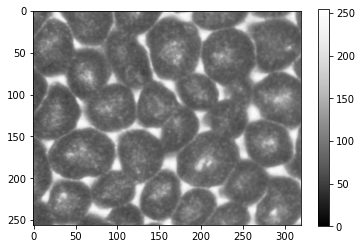

In [3]:
source_dir = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/LCB6mil90deg0_frames"
os.chdir(source_dir)
frame1 = cv.imread('frame1.png')
height, width, depth = np.shape(frame1)
frame1_downsized = cv.resize(frame1, (int(width/2), int(height/2)), cv.INTER_AREA) # downsize
frame1_downsized_gray = cv.cvtColor(frame1_downsized,cv.COLOR_BGR2GRAY)
frame1_cropped = frame1_downsized_gray[0:256,0:320]
plt.imshow(frame1_cropped, cmap='Greys_r', vmin=0, vmax=255)
plt.colorbar();

#### Step 1: Threshold in Python:

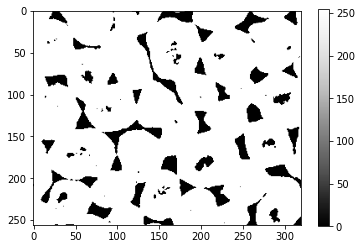

In [4]:
ret, thresh = cv.threshold(frame1_cropped,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh, cmap='Greys_r', vmin=0, vmax=255)
plt.colorbar();

#### Step 2: De-Noise in Python w/ Custom Functions

##### Testing:

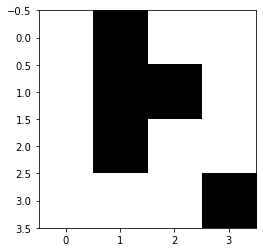

In [5]:
test_img = np.array([
    [255,0,255,255],
    [255,0,0,255],
    [255,0,255,255],
    [255,255,255,0],
])
plt.imshow(test_img, cmap='Greys_r');

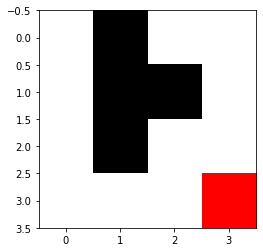

In [6]:
plt.imshow(colorareas(test_img, 2));

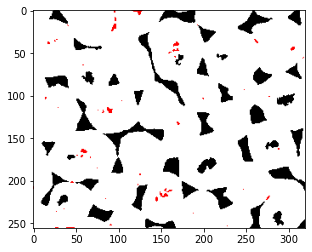

In [7]:
plt.imshow(colorareas(thresh, 40));

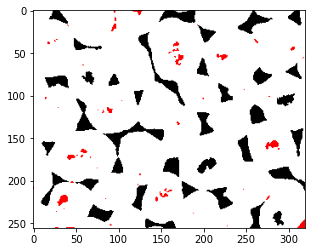

In [8]:
plt.imshow(colorareas(thresh, 110));

In [9]:
frame1_cropped_denoised = purgesmallareas(thresh, 110)

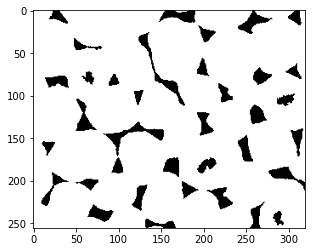

In [10]:
plt.imshow(frame1_cropped_denoised, cmap='Greys_r', vmin=0, vmax=255);

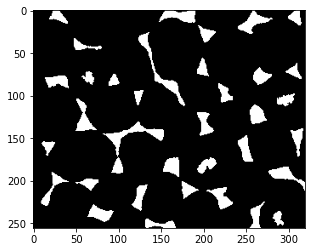

In [11]:
frame1_cropped_denoised_inverted = invert(frame1_cropped_denoised)
plt.imshow(frame1_cropped_denoised_inverted, cmap='Greys_r', vmin=0, vmax=255);

In [12]:

frame1_cropped_denoised_inverted_3channel = np.stack((frame1_cropped_denoised_inverted, frame1_cropped_denoised_inverted, frame1_cropped_denoised_inverted), axis=-1)
plt.imsave("frame1_crop_imagej.png", frame1_cropped_denoised_inverted_3channel)

#### Step 3: Watershed in ImageJ

In [13]:
watershed = cv.imread('watershed_screenshot.png')


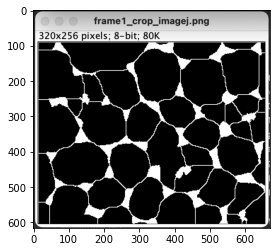

In [14]:
plt.imshow(watershed);

- Image -> Type -> 8bit
- Process -> Binary -> Watershed
- Analyze -> Analyze Particles

#### Testing New Irregularity Measurement:

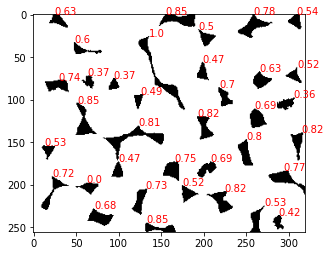

In [15]:
irregularityplot(frame1_cropped_denoised)

- Perhaps the next thing to do is to consider areas based on their area neighbors
    - do manual count first
- Centroid based measurement?
    - probably not; the long ones would fuck it up
- why can I so easily tell the nuclei apart from the real backgrounds?
    - most likely their situation between other areas
    - I am inferring cell-shapes from the other structures and taking out ones that don't make sense
- consult original greyscale values on og image?!??!